# First i install All required dependencies to implement this project

In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn




[notice] A new release of pip is available: 25.1.1 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Here im importing all required liabraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Data Preparation 

I had two data files in JSON format. First, I loaded both JSON files into my notebook. Then, I combined these two files into one final dataset so that all the information is in a single place.  

After merging the data, I converted the final file into a CSV format and saved it in a local folder. I did this so that I can easily access and use the data in the future without repeating the same steps again.


In [3]:
data1=pd.read_json("property_level.json")

In [4]:
data1.shape

(100, 18)

In [5]:
data2=pd.read_json("property_unseen.json")

In [6]:
data2.shape

(5, 18)

In [7]:
if set(data1.columns)==set(data2.columns):
    print("The columns of both datasets are the same." )
else:
    print("The columns of both datasets are different.")

The columns of both datasets are the same.


## Data Inspection 

I first used `head()` and `tail()` to get a quick view of the starting and ending rows of the dataset. Then, I used `sample()` to randomly check some records to understand the overall structure of the data. Finally, I checked the data types of all columns using `dtypes` to ensure that each column had the correct format before proceeding with further analysis. I identified 4 categorical columns and the remaining columns as numerical.


In [8]:
df=pd.concat([data1, data2], ignore_index=True)

In [9]:
df.shape

(105, 18)

In [10]:
df.to_csv("Final_property_data.csv", index=False)

In [11]:
df.head()

,id,type,location,carpet_area,bed_room,kitchen,living_room,dining_room,toilet,balcony,parking_area,floor,window_no,entrance_no,supplience,home_loan,wall_thick,price
0,1,Flat,Bangalore,2000,3,1,1,1,2,1,public,7,6,1,Yes,Yes,6,1300000
1,2,Flat,Delhi,1500,2,1,1,0,1,0,public,3,5,1,No,Yes,6,900000
2,3,Flat,Chennai,3400,6,1,1,1,5,4,public,14,12,1,Yes,Yes,6,2800000
3,4,Flat,Delhi,2400,4,1,1,1,3,2,public,9,8,1,Yes,No,6,1800000
4,5,Flat,Delhi,1800,3,1,1,1,2,1,public,6,6,1,Yes,Yes,6,1150000


In [12]:
df.tail()

,id,type,location,carpet_area,bed_room,kitchen,living_room,dining_room,toilet,balcony,parking_area,floor,window_no,entrance_no,supplience,home_loan,wall_thick,price
100,1,1,Jaipur,15600,37,1,1,1,35,34,private,36,74,2,1,1,8,29000000
101,2,0,Lucknow,8400,19,1,1,1,18,17,public,38,36,1,1,1,6,7600000
102,3,1,Nagpur,16000,38,1,1,1,36,35,private,37,76,2,1,1,8,30000000
103,4,0,Indore,8600,19,1,1,1,18,17,public,39,37,1,1,1,6,7800000
104,5,1,Thane,16400,39,1,1,1,37,36,private,38,78,2,1,1,8,31000000


In [13]:
df.sample(5)

,id,type,location,carpet_area,bed_room,kitchen,living_room,dining_room,toilet,balcony,parking_area,floor,window_no,entrance_no,supplience,home_loan,wall_thick,price
22,23,Flat,Hyderabad,2000,3,1,1,1,2,1,public,7,6,1,Yes,Yes,6,1350000
5,6,House,Ludhiana,12400,29,1,1,1,27,26,private,28,58,2,Yes,Yes,8,21000000
38,39,Flat,Kolkata,2000,3,1,1,1,2,1,public,7,6,1,Yes,Yes,6,1400000
1,2,Flat,Delhi,1500,2,1,1,0,1,0,public,3,5,1,No,Yes,6,900000
2,3,Flat,Chennai,3400,6,1,1,1,5,4,public,14,12,1,Yes,Yes,6,2800000


In [14]:
df.dtypes

id               int64
type            object
location        object
carpet_area      int64
bed_room         int64
kitchen          int64
living_room      int64
dining_room      int64
toilet           int64
balcony          int64
parking_area    object
floor            int64
window_no        int64
entrance_no      int64
supplience      object
home_loan       object
wall_thick       int64
price            int64
dtype: object

## Data Cleaning and Visualization 

First, I created a bar graph to check the different types of houses in my data. From the graph, I saw that most properties were either House or Flat, but there were a few values written as 1 and 0.  

So, I cleaned this by converting 1 to House and 0 to Flat. After this, my dataset had only two property types: House and Flat. I then plotted the bar graph again to confirm the changes.  

Finally, I created a pie chart to see how many properties are present in each city, which helped me understand the location wise distribution of the data.


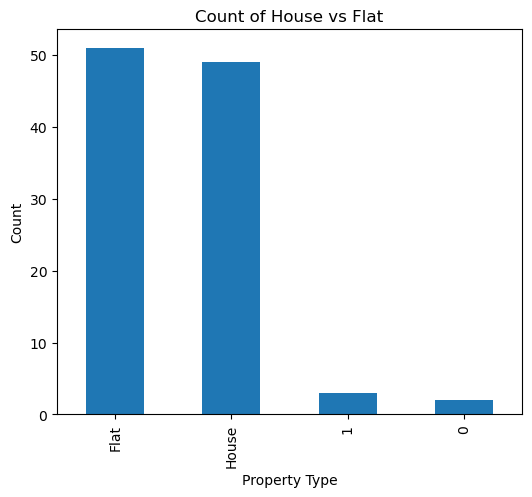

In [15]:
plt.figure(figsize=(6,5))
df['type'].value_counts().plot(kind='bar')
plt.title("Count of House vs Flat")
plt.xlabel("Property Type")
plt.ylabel("Count")
plt.show()


In [16]:
df[df["type"].isin([0,1])]

,id,type,location,carpet_area,bed_room,kitchen,living_room,dining_room,toilet,balcony,parking_area,floor,window_no,entrance_no,supplience,home_loan,wall_thick,price
100,1,1,Jaipur,15600,37,1,1,1,35,34,private,36,74,2,1,1,8,29000000
101,2,0,Lucknow,8400,19,1,1,1,18,17,public,38,36,1,1,1,6,7600000
102,3,1,Nagpur,16000,38,1,1,1,36,35,private,37,76,2,1,1,8,30000000
103,4,0,Indore,8600,19,1,1,1,18,17,public,39,37,1,1,1,6,7800000
104,5,1,Thane,16400,39,1,1,1,37,36,private,38,78,2,1,1,8,31000000


In [17]:
df=df.replace({"type":{1:"House", 0:"Flat"}})

Text(0.5, 1.0, 'Count of House vs Flat')

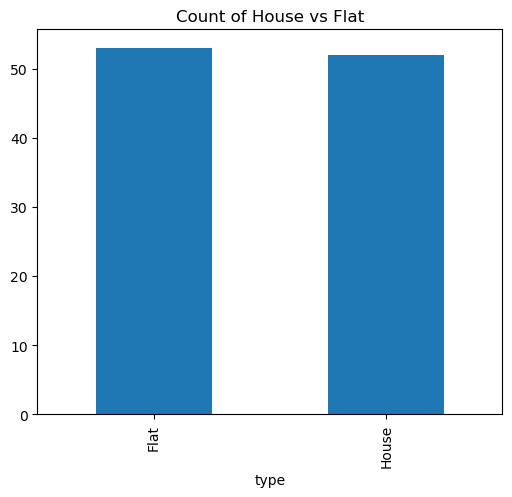

In [18]:
plt.figure(figsize=(6,5))
df['type'].value_counts().plot(kind='bar')
plt.title("Count of House vs Flat")


In [19]:
col_list=df.columns.tolist()
df[col_list].apply(lambda x: x.unique())

id              [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
type                                                [Flat, House]
location        [Bangalore, Delhi, Chennai, Ludhiana, Faridaba...
carpet_area     [2000, 1500, 3400, 2400, 1800, 12400, 13200, 1...
bed_room        [3, 2, 6, 4, 29, 31, 21, 5, 26, 16, 11, 9, 25,...
kitchen                                                       [1]
living_room                                                   [1]
dining_room                                                [1, 0]
toilet          [2, 1, 5, 3, 27, 29, 19, 24, 15, 10, 7, 4, 8, ...
balcony         [1, 0, 4, 2, 26, 28, 18, 23, 14, 9, 6, 3, 7, 2...
parking_area                                    [public, private]
floor           [7, 3, 14, 9, 6, 28, 30, 20, 4, 25, 33, 24, 8,...
window_no       [6, 5, 12, 8, 58, 62, 4, 42, 10, 52, 31, 22, 1...
entrance_no                                                [1, 2]
supplience                                           [Yes, No, 1]
home_loan 

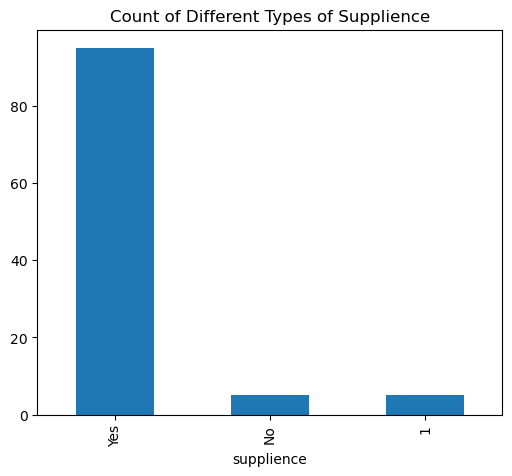

In [20]:
plt.figure(figsize=(6,5))
df['supplience'].value_counts().plot(kind='bar')
plt.title("Count of Different Types of Supplience")
plt.show()

In [21]:
df["supplience"] = df["supplience"].replace({1:"Yes"})
df["home_loan"] = df["home_loan"].replace({1:"Yes"})

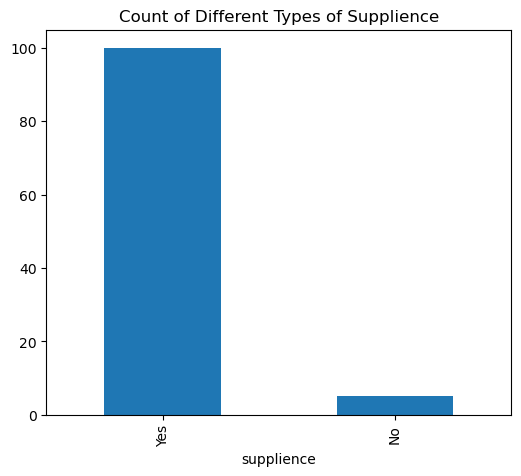

In [22]:
plt.figure(figsize=(6,5))
df['supplience'].value_counts().plot(kind='bar')
plt.title("Count of Different Types of Supplience")
plt.show()


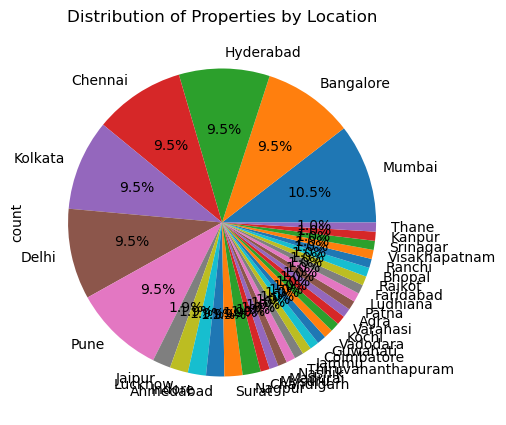

In [23]:
plt.figure(figsize=(6,5))
df['location'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Distribution of Properties by Location")   
plt.show()


## Data Cleaning and Feature Selection  

First, I checked if my dataset had any missing (null) values using `isna().sum()`. I found that there were no null values, so I did not need to fill or remove any data for missing values.  

After that, I checked for duplicate rows using `duplicated().sum()`. There were no duplicate records, so I did not remove any rows from the dataset.  

Next, I checked the correlation of all numerical columns with the target variable **price** using a correlation matrix. This helped me understand which features are strongly related to house price.  

Based on the correlation results:  
- I kept only those columns that had high correlation with price because they are more important for prediction.  
- I removed the remaining columns that had low correlation with price because they were not very useful.  

### Why I removed some columns?  
I removed less important columns because:  
- They had very weak relation with price.  
- They were not helping much in prediction.  
- Keeping them could confuse the model.  
- Removing them made my model simpler and more accurate.  


In [24]:
df.isna().sum()

id              0
type            0
location        0
carpet_area     0
bed_room        0
kitchen         0
living_room     0
dining_room     0
toilet          0
balcony         0
parking_area    0
floor           0
window_no       0
entrance_no     0
supplience      0
home_loan       0
wall_thick      0
price           0
dtype: int64

In [25]:
df.duplicated().sum()

0

In [26]:
corr_col = df.select_dtypes(include=['int64', 'float64'])
correlation=corr_col.corr()
correlation

,id,carpet_area,bed_room,kitchen,living_room,dining_room,toilet,balcony,floor,window_no,entrance_no,wall_thick,price
id,1.000000,-0.133171,-0.139422,NaN,NaN,0.112861,-0.144356,-0.144356,-0.105214,-0.142275,0.073576,0.065407,-0.159894
carpet_area,-0.133171,1.000000,0.999259,NaN,NaN,0.373016,0.997530,0.997530,0.841408,0.998875,0.435072,0.556001,0.973283
bed_room,-0.139422,0.999259,1.000000,NaN,NaN,0.355484,0.998881,0.998881,0.839793,0.999601,0.423157,0.544182,0.975293
kitchen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
living_room,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dining_room,0.112861,0.373016,0.355484,NaN,NaN,1.000000,0.342028,0.342028,0.380794,0.345346,0.355806,0.547047,0.282856
toilet,-0.144356,0.997530,0.998881,NaN,NaN,0.342028,1.000000,1.000000,0.856593,0.998178,0.384181,0.507810,0.971256
balcony,-0.144356,0.997530,0.998881,NaN,NaN,0.342028,1.000000,1.000000,0.856593,0.998178,0.384181,0.507810,0.971256
floor,-0.105214,0.841408,0.839793,NaN,NaN,0.380794,0.856593,0.856593,1.000000,0.829385,-0.031038,0.153231,0.724934
window_no,-0.142275,0.998875,0.999601,NaN,NaN,0.345346,0.998178,0.998178,0.829385,1.000000,0.432703,0.550000,0.979220


In [27]:
df = df.drop(columns=["id","kitchen","living_room","dining_room","entrance_no","wall_thick"], axis=1)
df.head(1)

,type,location,carpet_area,bed_room,toilet,balcony,parking_area,floor,window_no,supplience,home_loan,price
0,Flat,Bangalore,2000,3,2,1,public,7,6,Yes,Yes,1300000


## Outlier Detection and Removal  

In the next step, I checked for outliers in different numerical columns using the **IQR (Interquartile Range) method**. For each important column, I calculated Q1, Q3, and IQR, and then used lower and upper limits to find extreme values in the data.  

After finding the outliers, I removed them from the dataset using filter conditions so that only normal and useful data remained.  
  

I removed outliers because:  
- Outliers can reduce the accuracy of the model.  
- They can confuse the model while training.  
- Very high or very low values can disturb the relationship between features and price.  
- Removing them helps the model learn better and make better predictions.  


In [28]:
Q1 = df['bed_room'].quantile(0.25)
Q3 = df['bed_room'].quantile(0.75)  
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
lower_bound, upper_bound

(-15.5, 36.5)

In [29]:
outliers = df[(df['bed_room'] < lower_bound) | (df['bed_room'] > upper_bound)]
outliers

,type,location,carpet_area,bed_room,toilet,balcony,parking_area,floor,window_no,supplience,home_loan,price
100,House,Jaipur,15600,37,35,34,private,36,74,Yes,Yes,29000000
102,House,Nagpur,16000,38,36,35,private,37,76,Yes,Yes,30000000
104,House,Thane,16400,39,37,36,private,38,78,Yes,Yes,31000000


In [30]:

df = df[df["bed_room"] <= upper_bound]

In [31]:
Q1 = df['window_no'].quantile(0.25)
Q3 = df['window_no'].quantile(0.75)  
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
lower_bound, upper_bound

(-28.0, 68.0)

In [32]:
outliers = df[(df['window_no'] < lower_bound) | (df['window_no'] > upper_bound)]
outliers

,type,location,carpet_area,bed_room,toilet,balcony,parking_area,floor,window_no,supplience,home_loan,price
35,House,Ahmedabad,15200,36,34,33,private,35,72,Yes,Yes,28000000
97,House,Kolkata,14800,35,33,32,private,34,70,Yes,No,27000000


In [33]:

df = df[df["window_no"] <= upper_bound]

In [34]:
Q1 = df['carpet_area'].quantile(0.25)
Q3 = df['carpet_area'].quantile(0.75)  
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
lower_bound, upper_bound

(-4875.0, 14525.0)

In [35]:
outliers = df[(df['carpet_area'] < lower_bound) | (df['carpet_area'] > upper_bound)]
outliers

,type,location,carpet_area,bed_room,toilet,balcony,parking_area,floor,window_no,supplience,home_loan,price


## Feature Engineering – Handling Categorical Columns  

Some columns in my dataset were categorical , but a machine learning model only understands numbers. So, I converted these categorical columns into numerical form.  

I used **Label Encoding** for columns that had few categories and **One-Hot Encoding (dummies)** for columns like *location* and *type*. This helped the model properly understand and use these features for prediction.  


In [36]:
df.head(1)

,type,location,carpet_area,bed_room,toilet,balcony,parking_area,floor,window_no,supplience,home_loan,price
0,Flat,Bangalore,2000,3,2,1,public,7,6,Yes,Yes,1300000


In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["parking_area"]=le.fit_transform(df["parking_area"])
df["supplience"]=le.fit_transform(df["supplience"])
df["home_loan"]=le.fit_transform(df["home_loan"])

In [38]:
df=pd.get_dummies(df,columns=["location","type"],drop_first=True,dtype=int)

In [39]:
df.head()

,carpet_area,bed_room,toilet,balcony,parking_area,floor,window_no,supplience,home_loan,price,...,location_Pune,location_Rajkot,location_Ranchi,location_Srinagar,location_Surat,location_Thiruvananthapuram,location_Vadodara,location_Varanasi,location_Visakhapatnam,type_House
0,2000,3,2,1,1,7,6,1,1,1300000,...,0,0,0,0,0,0,0,0,0,0
1,1500,2,1,0,1,3,5,0,1,900000,...,0,0,0,0,0,0,0,0,0,0
2,3400,6,5,4,1,14,12,1,1,2800000,...,0,0,0,0,0,0,0,0,0,0
3,2400,4,3,2,1,9,8,1,0,1800000,...,0,0,0,0,0,0,0,0,0,0
4,1800,3,2,1,1,6,6,1,1,1150000,...,0,0,0,0,0,0,0,0,0,0


## Model Training and Evaluation  

After preparing the data, I split it into input (X) and target (y). Then, I divided the data into training and testing sets using `train_test_split`. The training data was used to train the model, and the testing data was used to check how well the model performs.  

I trained a **Linear Regression** model on the training data. To evaluate the model, I used **R² score and Mean Absolute Error (MAE)** to understand the prediction accuracy.  

After that, I applied **Ridge Regularization** and trained the model again. When I evaluated this new model, I saw a slight improvement in performance, which shows that regularization helped the model a little.  


In [40]:
X=df.drop(columns=["price"], axis=1)
X

,carpet_area,bed_room,toilet,balcony,parking_area,floor,window_no,supplience,home_loan,location_Ahmedabad,...,location_Pune,location_Rajkot,location_Ranchi,location_Srinagar,location_Surat,location_Thiruvananthapuram,location_Vadodara,location_Varanasi,location_Visakhapatnam,type_House
0,2000,3,2,1,1,7,6,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1500,2,1,0,1,3,5,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3400,6,5,4,1,14,12,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2400,4,3,2,1,9,8,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1800,3,2,1,1,6,6,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,3600,6,4,3,0,5,12,1,1,0,...,0,0,0,0,0,0,0,0,0,1
98,3200,6,5,4,1,13,11,1,1,0,...,0,0,0,0,0,0,0,0,0,0
99,2600,4,3,2,1,10,8,1,1,0,...,0,0,0,0,0,0,0,0,0,0
101,8400,19,18,17,1,38,36,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
y=df["price"]
y

0      1300000
1       900000
2      2800000
3      1800000
4      1150000
        ...   
96     3500000
98     2600000
99     2000000
101    7600000
103    7800000
Name: price, Length: 100, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [43]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [44]:
y_pred = model.predict(X_test)
y_pred

array([23738633.56102953,  6887649.09907246,  2315778.8324874 ,
       10205865.84814151, 20169723.10051546,  2985070.24868574,
        4911490.58247361,  1864439.76138016, 13010313.30069345,
        3912509.6699958 , 11960299.67127896,  3553802.67843251,
        1311919.06776998,   526504.8075438 ,  1123327.57607   ,
       16987763.18948346,  1335910.96093539,   970994.82820073,
        3021547.71071915, 14601293.25620944])

In [45]:
y_test.values

array([25000000,  7000000,  2800000,  9000000, 20000000,  2500000,
        4800000,  2200000, 11000000,  3500000, 10200000,  4000000,
         600000,  1250000,   850000, 16000000,  1350000,   900000,
        2700000, 13000000], dtype=int64)

In [46]:
import pandas as pd

df_results = pd.DataFrame({
    
    "Actual_price": y_test,
    "Predicted_price": y_pred.round(0)
})

df_results


,Actual_price,Predicted_price
26,25000000,23738634.0
87,7000000,6887649.0
2,2800000,2315779.0
56,9000000,10205866.0
76,20000000,20169723.0
94,2500000,2985070.0
16,4800000,4911491.0
74,2200000,1864440.0
55,11000000,13010313.0
96,3500000,3912510.0


model avaluation

In [47]:
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error

print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", root_mean_squared_error(y_test, y_pred))

R2 Score: 0.9827935945172872
MAE: 674969.9174678018
RMSE: 892862.8451022336


performance increase


In [48]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1)
ridge.fit(X_train,y_train.values)

y_pred2=ridge.predict(X_test)

In [49]:
import pandas as pd

df_results = pd.DataFrame({
    
    "Actual_price": y_test,
    "Predicted_price": y_pred2.round(0)
})

df_results


,Actual_price,Predicted_price
26,25000000,23626992.0
87,7000000,6986980.0
2,2800000,2329355.0
56,9000000,10211008.0
76,20000000,19820467.0
94,2500000,2942304.0
16,4800000,4693389.0
74,2200000,1805297.0
55,11000000,12695312.0
96,3500000,3881094.0


In [50]:
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error

print("R2 Score:", r2_score(y_test, y_pred2))
print("MAE:", mean_absolute_error(y_test, y_pred2))
print("RMSE:", root_mean_squared_error(y_test, y_pred2))

R2 Score: 0.9854154438890905
MAE: 621076.7094142061
RMSE: 822027.378059795


In [51]:
import joblib
joblib.dump(ridge, "house_price_prediction_model.pkl")

['house_price_prediction_model.pkl']

## Top 3 Most Influential Features on Price

Based on the correlation values with price, the three most important features are:

1. **window_no** – It has the highest correlation with price (0.979). More windows generally mean better ventilation and value.
2. **bed_room** – It is strongly related to price (0.975). More bedrooms usually increase house price.
3. **carpet_area** – It also has a very high correlation (0.973). Bigger houses are usually more expensive.

So, these three features have the most impact on house price.


In [52]:
correlation

,id,carpet_area,bed_room,kitchen,living_room,dining_room,toilet,balcony,floor,window_no,entrance_no,wall_thick,price
id,1.000000,-0.133171,-0.139422,NaN,NaN,0.112861,-0.144356,-0.144356,-0.105214,-0.142275,0.073576,0.065407,-0.159894
carpet_area,-0.133171,1.000000,0.999259,NaN,NaN,0.373016,0.997530,0.997530,0.841408,0.998875,0.435072,0.556001,0.973283
bed_room,-0.139422,0.999259,1.000000,NaN,NaN,0.355484,0.998881,0.998881,0.839793,0.999601,0.423157,0.544182,0.975293
kitchen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
living_room,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dining_room,0.112861,0.373016,0.355484,NaN,NaN,1.000000,0.342028,0.342028,0.380794,0.345346,0.355806,0.547047,0.282856
toilet,-0.144356,0.997530,0.998881,NaN,NaN,0.342028,1.000000,1.000000,0.856593,0.998178,0.384181,0.507810,0.971256
balcony,-0.144356,0.997530,0.998881,NaN,NaN,0.342028,1.000000,1.000000,0.856593,0.998178,0.384181,0.507810,0.971256
floor,-0.105214,0.841408,0.839793,NaN,NaN,0.380794,0.856593,0.856593,1.000000,0.829385,-0.031038,0.153231,0.724934
window_no,-0.142275,0.998875,0.999601,NaN,NaN,0.345346,0.998178,0.998178,0.829385,1.000000,0.432703,0.550000,0.979220


## 5. Analysis: Why is the price this way?

The property price is mainly influenced by physical characteristics such as carpet area, number of bedrooms, and number of windows.  
Larger properties generally have higher prices because they provide more living space and comfort.  
Location also plays an important role, as properties in well-developed or prime areas tend to be more expensive.  
The type of property (House or Flat) affects pricing, with houses usually having higher value than flats.  
Features like parking area, balconies, and availability of home loans also impact buyer preference and price.  
Overall, the predicted prices reflect a combination of property size, structural features, and location-based market trends.


## Proposed Improvements

- I can improve the model by performing **hyperparameter tuning** instead of using default settings.  
- I can use **GridSearchCV** to find the best combination of model parameters systematically.  
- I can try more advanced models like **Random Forest or XGBoost** and optimize them using GridSearchCV.  
- I can increase the model performance by adding more real estate data since the current dataset is small.  
- With more data and proper tuning, the model can generalize better and make more accurate predictions.  
- I can apply **regularization techniques** to reduce overfitting and make the model more stable.  
